In [1]:
!pip install opencv-python-headless

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show_image(title, img, cmap=None):
    """

    """
    plt.figure(figsize=(5, 5))
    if len(img.shape) == 2:
      plt.imshow(img, cmap=cmap if cmap else 'gray')
    else:
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

Number of contours found: 1


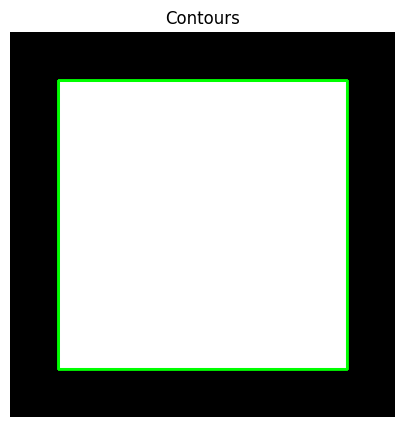

In [4]:
# 1) Create a synthetic image (400x400, black background)
image = np.zeros((400, 400), dtype=np.uint8)  # single channel (grayscale)

# 2) Draw a white rectangle
cv2.rectangle(image, (50, 50), (350, 350), 255, -1)

# 3) Find contours
# Note: image must be an 8-bit single-channel binary (or thresholded) image.
contours, hierarchy = cv2.findContours(
    image.copy(),  # copy, to avoid modifying the original
    cv2.RETR_TREE,  # retrieve all contours in a tree structure
    cv2.CHAIN_APPROX_SIMPLE  # compress horizontal/vertical/diagonal segments
)

print(f"Number of contours found: {len(contours)}")

# 4) Draw contours on a BGR image for visualization
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # convert to 3-channel (BGR)
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)  # draw contours in green with thickness 2

# Show the result
show_image("Contours", output)

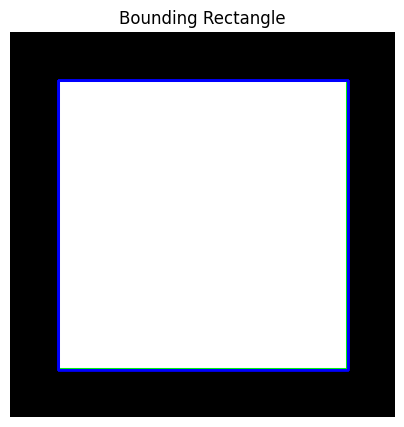

In [10]:
contour = contours[0]

x, y , w, h = cv2.boundingRect(contour)

output_rect = output.copy()
cv2.rectangle(output_rect, (x, y), (x+w, y+h), (255, 0, 0), 2)

show_image("Bounding Rectangle", output_rect)

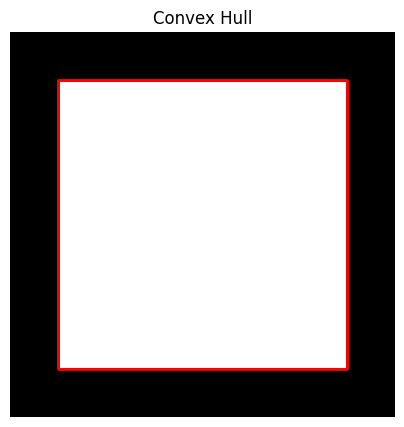

In [11]:
hull = cv2.convexHull(contour)

output_hull = output.copy()
cv2.drawContours(output_hull, [hull], -1, (0, 0, 255), 2)

show_image("Convex Hull", output_hull)

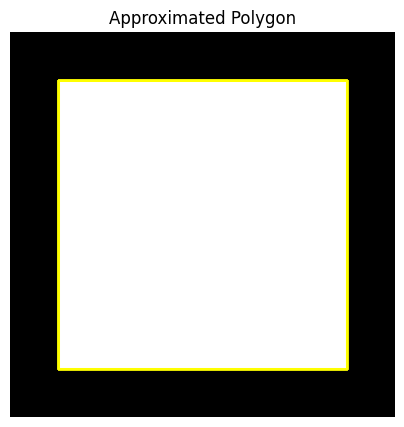

In [12]:
epsilon = 0.02 * cv2.arcLength(contour, True)
approx = cv2.approxPolyDP(contour, epsilon, True)

output_approx = output.copy()
cv2.drawContours(output_approx, [approx], -1, (0, 255, 255), 2)

show_image("Approximated Polygon", output_approx)

In [13]:
area = cv2.contourArea(contour)
perimeter = cv2.arcLength(contour, True)
moments = cv2.moments(contour)

print(f"Contour Area: {area}")
print(f"Contour Perimeter: {perimeter}")
print(f"Moments: {moments}")

if moments['m00'] != 0:
    cx = int(moments['m10'] / moments['m00'])
    cy = int(moments['m01'] / moments['m00'])
    print(f"Centroid (x, y): ({cx}, {cy})")
else:
    print("Contour area is zero, cannot compute centroid.")

Contour Area: 90000.0
Contour Perimeter: 1200.0
Moments: {'m00': 90000.0, 'm10': 18000000.0, 'm01': 18000000.0, 'm20': 4275000000.0, 'm11': 3600000000.0, 'm02': 4275000000.0, 'm30': 1125000000000.0, 'm21': 855000000000.0, 'm12': 855000000000.0, 'm03': 1125000000000.0, 'mu20': 675000000.0, 'mu11': 0.0, 'mu02': 675000000.0, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.08333333333333334, 'nu11': 0.0, 'nu02': 0.08333333333333334, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}
Centroid (x, y): (200, 200)


minAreaRect -> ((200.0, 200.0), (300.0, 300.0), 90.0)
Box points: [[ 50  50]
 [350  50]
 [350 350]
 [ 50 350]]


<ipython-input-14-49c60072c21d>:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box_points = np.int0(box_points)  # 꼭짓점을 정수 형태로 변환


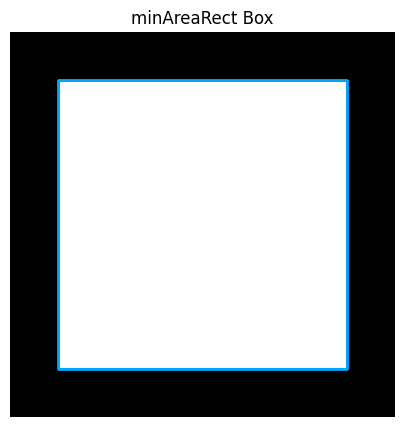

In [14]:
# Demonstrate minAreaRect
rotated_rect = cv2.minAreaRect(contour)  # 최소 면적의 회전된 사각형 계산 ((cx, cy), (w, h), angle)
box_points = cv2.boxPoints(rotated_rect)  # 회전된 사각형의 네 꼭짓점 계산
box_points = np.int0(box_points)  # 꼭짓점을 정수 형태로 변환

print("minAreaRect ->", rotated_rect)  # 회전된 사각형 정보 출력
print("Box points:", box_points)  # 네 꼭짓점 좌표 출력

# 회전된 사각형을 그리기 위해 이미지 복사
output_minarea = output.copy()  # 원본 이미지를 복사
cv2.drawContours(output_minarea, [box_points], -1, (255, 165, 0), 2)  # 주황색으로 사각형 그리기

# 결과 이미지 출력
show_image("minAreaRect Box", output_minarea)

Number of contours found: 3


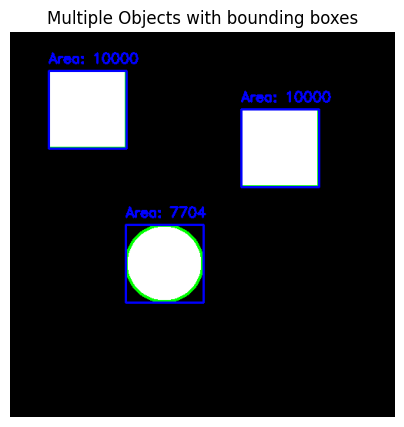

In [15]:
# 1) Create a black image (500x500)
multi_img = np.zeros((500, 500), dtype=np.uint8)

# 2) Draw multiple shapes (two rectangles, one circle)
cv2.rectangle(multi_img, (50, 50), (150, 150), 255, -1)
cv2.rectangle(multi_img, (300, 100), (400, 200), 255, -1)
cv2.circle(multi_img, (200, 300), 50, 255, -1)

# 3) Find contours
contours_multi, hierarchy_multi = cv2.findContours(multi_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of contours found: {len(contours_multi)}")

# 4) Convert to BGR for drawing
multi_output = cv2.cvtColor(multi_img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(multi_output, contours_multi, -1, (0, 255, 0), 2)

# Loop through contours to draw bounding boxes and add area text
for i, cnt in enumerate(contours_multi):
    # Calculate area
    area_ = cv2.contourArea(cnt)

    # Get bounding box
    x, y, w, h = cv2.boundingRect(cnt)

    # Draw bounding rectangle
    cv2.rectangle(multi_output, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Put text (area) on the image
    cv2.putText(multi_output, f"Area: {int(area_)}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

# Show the image
show_image("Multiple Objects with bounding boxes", multi_output)